In [34]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

### Labeling

In [37]:
import re
def my_label(image_name):
    name=re.split('[-.]+',image_name)
    name=name[-3]
    if name in classes:
        return classes.index(name)
    else:
        classes.append(name)
        return classes.index(name)

### Data

In [4]:
import os
from random import shuffle
from tqdm import tqdm

In [5]:
def my_data():
    data=[]
    for folder in tqdm(os.listdir("images")):
        t_path=os.path.join("images"+"//"+folder)
        for img in tqdm(os.listdir("images"+"//"+folder)):
            path=os.path.join(t_path,img)
            img_data=cv2.imread(path)
            img_data=cv2.resize(img_data,(50,50))
            data.append([np.array(img_data),my_label(img)])
    shuffle(data)
    return data    

In [38]:
classes=[]
data=my_data()

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.86it/s]


In [39]:
classes

['cat', 'dog', 'horse', 'rider']

In [40]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

In [41]:
x=np.array([a[0] for a in data]).reshape(-1,50,50,3)
y=np.array([a[1] for a in data])
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

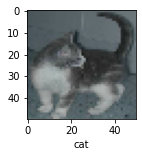

In [42]:
plot_sample(x_train,y_train,2)

In [50]:
#Normalizing the pixels of images
x_train=x_train/255.0
x_test=x_test/255.0

(808, 50, 50, 3)


### Artificial Neural Networks

In [45]:
ann=models.Sequential([
    layers.Flatten(input_shape=[50,50,3]),
    layers.Dense(30,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [22]:
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
21/21 [==============================] - 1s 3ms/step - loss: 1.7911 - accuracy: 0.2198
Epoch 2/5
21/21 [==============================] - 0s 3ms/step - loss: 1.5216 - accuracy: 0.2430
Epoch 3/5
21/21 [==============================] - 0s 3ms/step - loss: 1.3776 - accuracy: 0.3050
Epoch 4/5
21/21 [==============================] - 0s 2ms/step - loss: 1.4595 - accuracy: 0.3235
Epoch 5/5
21/21 [==============================] - 0s 2ms/step - loss: 1.3470 - accuracy: 0.3669


In [23]:
ann.evaluate(x_test,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 1.2666 - accuracy: 0.4321


[1.2665565013885498, 0.43209877610206604]

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.33      0.59      0.43        37
           1       0.00      0.00      0.00        36
           2       0.47      0.79      0.59        52
           3       0.88      0.19      0.31        37

    accuracy                           0.43       162
   macro avg       0.42      0.39      0.33       162
weighted avg       0.43      0.43      0.36       162



### SVM

In [52]:
x= x.reshape(len(x),-1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [54]:
from sklearn import svm
svm = svm.SVC(kernel='rbf', probability=True, random_state=42)

# fit model
svm.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [57]:
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40        35
           1       0.41      0.49      0.45        39
           2       0.70      0.78      0.74        41
           3       0.69      0.51      0.59        47

    accuracy                           0.55       162
   macro avg       0.55      0.54      0.54       162
weighted avg       0.56      0.55      0.55       162



In [62]:
from sklearn import svm
svm = svm.SVC(kernel='poly', probability=True, random_state=42)

# fit model
svm.fit(x_train, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [63]:
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.51      0.39        35
           1       0.38      0.41      0.40        39
           2       0.75      0.66      0.70        41
           3       0.69      0.38      0.49        47

    accuracy                           0.49       162
   macro avg       0.53      0.49      0.49       162
weighted avg       0.55      0.49      0.50       162

